In [1]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS

In [2]:
#abrir mi fits
slit4 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4.fits'
sp4 = fits.open(slit4)

sp4.info()
sp4[0].header["OBJECT"]

Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2245, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_5689/4204268105.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

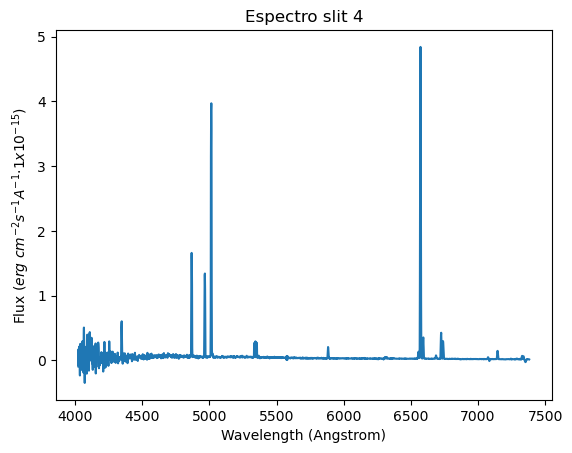

In [3]:
# extraer data (flux)
data4=sp4[0].data
header4=sp4[0].header
obj_name4 = header4.get("OBJECT", "Unknown")

flux4=data4[0]
w4=WCS(header4, naxis=1, relax=False, fix=False)
wave4=w4.wcs_pix2world(np.arange(len(flux4)),0)[0]

plt.plot(wave4, flux4)
plt.title("Espectro slit 4")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [4]:
wave4, flux4

(array([4024.0715332 , 4025.56758475, 4027.0636363 , ..., 7378.2191081 ,
        7379.71515965, 7381.2112112 ]),
 array([-0.09429397,  0.17127489, -0.08293189, ...,  0.01595764,
         0.01675883,  0.01477239], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_5689/2236862303.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


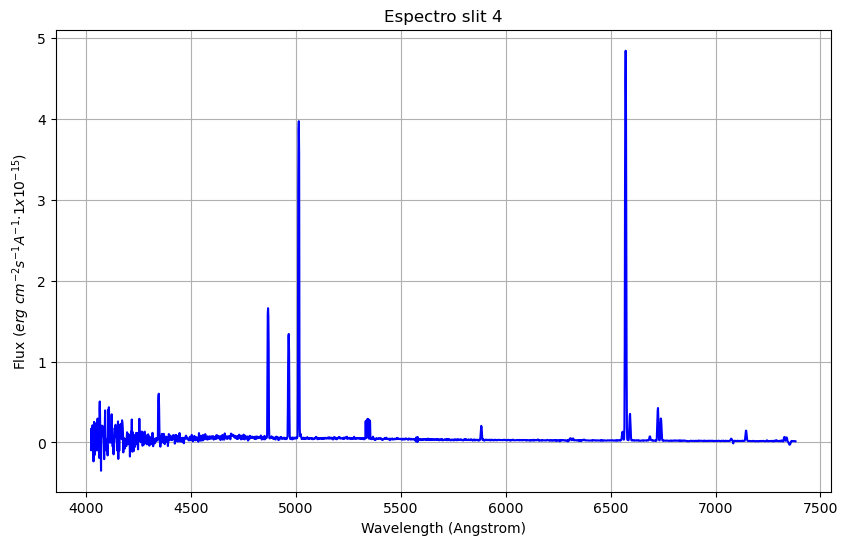

In [5]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave4, flux4, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 4')
plt.grid(True)
plt.show()

In [ ]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave1
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave1_ccm89 = extinction.ccm89(wave1, 0.299, 3.1)
print(f' extinción en magnitudes para slit 1 con ccm89: {wave1_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave1_f99 = extinction.fitzpatrick99(wave1, 0.299, 3.1)
print(f' extinción en magnitudes para slit 1 con f99: {wave1_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave1_fm07 = extinction.fm07(wave1, 0.299)
print(f' extinción en magnitudes para slit 1 con fm07: {wave1_fm07}')